In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Problem description
In this problem, we will start with a single dimensional dataset which is generated using a linear operation $ y = a * x + b + err$. The goal is to estimate the constants a, b using gradient descent and verify it can recover the known constants.

In [16]:
a = 5.0
b = 2.0
x = np.random.randn(1, 1000)
err = np.random.randn(1, 1000)
y = a * x + b + err

Text(0,0.5,'y')

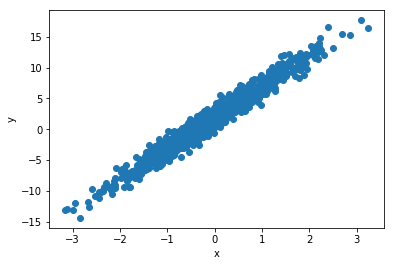

In [17]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

Let us estimate y using $\hat{y}=w x + b$ . We can determine the optimal value of $w, b$ using gradient descent. The loss function will be mse defined as 

$J(w)=\frac{1}{m}\sum_i{\frac{1}{2} (\hat{y_i}-y_i)^2}$

Gradient can be computed as

$\frac{\delta(J)}{\delta(w)} = \frac{1}{m} \sum_i^m(\hat(y_i)-y_i) x _i$

$\frac{\delta(J)}{\delta(b)} = \frac{1}{m} \sum_i^m(\hat(y_i)-y_i)$

Let calls this $dw, db$

In each iteration, we update the parameter to move against the gradient

$w' = w - \alpha dw$

$b' = b - \alpha db$

In [23]:
w = np.random.randn()
b = 0

# define learning parameter
iterations = 100
alpha = 0.1



w_iter = []
b_iter = []
cost_iter = []

for i in range(iterations):
    yhat = w * x + b
    dw = 0#TODO
    db = 0#TODO
    
    w  = 0#TODO
    b  = 0#TODO
    cost = 0#TODO
    
    w_iter.append(w)
    b_iter.append(b)
    cost_iter.append(cost)

We will track the value of w and cost over time. The value of w should converge to the known constant 'a' and the cost should decrease over time

Text(0,0.5,'weight')

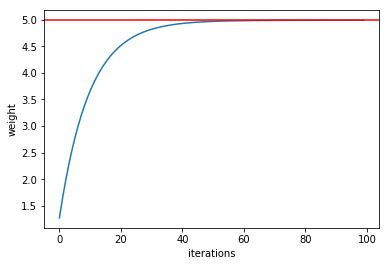

In [19]:
plt.plot(range(iterations), w_iter)
plt.axhline(a, color='red')
plt.xlabel('iterations')
plt.ylabel('weight')

We will track the value of b and cost over time. The value of w should converge to the known constant 'b' and the cost should decrease over time

Text(0,0.5,'offset')

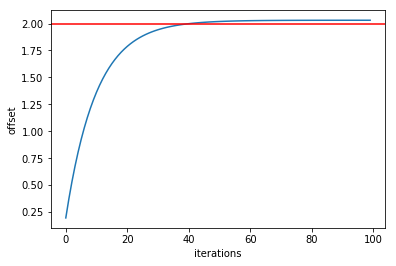

In [21]:
plt.plot(range(iterations), b_iter)
plt.axhline(b, color='red')
plt.xlabel('iterations')
plt.ylabel('offset')

Text(0,0.5,'cost')

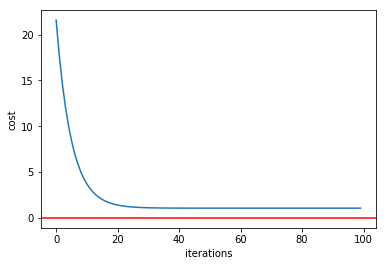

In [22]:
plt.plot(range(iterations), cost_iter)
plt.axhline(0, color='red')
plt.xlabel('iterations')
plt.ylabel('cost')


## Tensorflow implementation
Let us know redo the same using tensorflow and gradient descent. 

In [35]:
tx = tf.constant(x, dtype=tf.float32)
ty = tf.constant(y, dtype=tf.float32)

tw = tf.Variable(initial_value=np.random.randn(), dtype=tf.float32, trainable=True)
tb = tf.Variable(initial_value=0, dtype=tf.float32, trainable=True)
tyhat = tx * tw  + tb

cost = #TODO
optimizer = #TODO
train = optimizer.minimize(cost)



In [36]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    cost_iter = []
    weight_iter = []
    offset_iter = []
    for i in range(iterations):
        sess.run(train)
        weight_iter.append(sess.run(tw))
        offset_iter.append(sess.run(tb))
        cost_iter.append(sess.run(cost))
    

In [45]:
# Known constants that generated the data
a = 5.0
b = 2.0

Text(0,0.5,'weight')

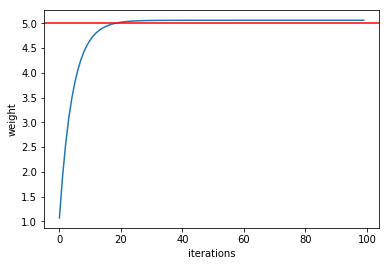

In [46]:
plt.plot(range(iterations), weight_iter)
plt.axhline(a, color='red')
plt.xlabel('iterations')
plt.ylabel('weight')

Text(0,0.5,'offset')

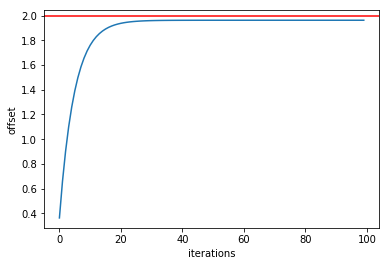

In [47]:
plt.plot(range(iterations), offset_iter)
plt.axhline(b, color='red')
plt.xlabel('iterations')
plt.ylabel('offset')

Text(0,0.5,'cost')

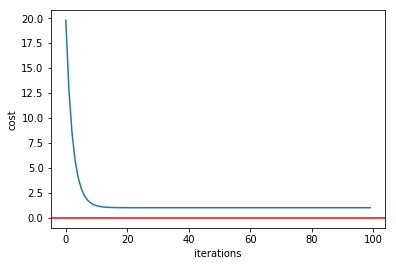

In [48]:
plt.plot(range(iterations), cost_iter)
plt.axhline(0, color='red')
plt.xlabel('iterations')
plt.ylabel('cost')


In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=#TODO))
model.compile(loss=keras.losses.mse, optimizer= keras.optimizers.SGD(lr=0.1))

In [57]:
model.fit(#TODO)

Epoch 1/30
1000/1000 [==============================] - 0s - loss: 1.0342     
Epoch 2/30
1000/1000 [==============================] - 0s - loss: 1.0359     
Epoch 3/30
1000/1000 [==============================] - 0s - loss: 1.0285     
Epoch 4/30
1000/1000 [==============================] - 0s - loss: 1.0319     
Epoch 5/30
1000/1000 [==============================] - 0s - loss: 1.0306     
Epoch 6/30
1000/1000 [==============================] - 0s - loss: 1.0322     
Epoch 7/30
1000/1000 [==============================] - 0s - loss: 1.0273     
Epoch 8/30
1000/1000 [==============================] - 0s - loss: 1.0348     
Epoch 9/30
1000/1000 [==============================] - 0s - loss: 1.0314     
Epoch 10/30
1000/1000 [==============================] - 0s - loss: 1.0278     
Epoch 11/30
1000/1000 [==============================] - 0s - loss: 1.0393     
Epoch 12/30
1000/1000 [==============================] - 0s - loss: 1.0323     
Epoch 13/30
1000/1000 [==========================

In [58]:
# Known constants that generated the data
a = 5.0
b = 2.0
model.get_weights()

[array([[5.029991]], dtype=float32), array([1.9679593], dtype=float32)]